#### 1. Read the City Cemetery data into a pandas DataFrame. **Hint:** see the [`read_excel` function](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
cemetery_df=pd.read_excel('../data/Historic_Nashville_City_Cemetery_Interments__1846-1979.xlsx')

In [3]:
cemetery_df.head(2)

,Volume,Name,Burial Month,Month No.,Burial Day,Burial Year,Sex,Race,Age,Residence,Cause of Death/Burial,Ave,Section/Lot,Remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."


In [4]:
cemetery_df = cemetery_df.rename(columns={"Volume":"volume","Name":"name","Burial Month":"burial_month","Month No.":"month_number","Burial Day":"burial_day","Burial Year":"burial_year","Sex":"sex","Race":"race","Age":"age","Residence":"residence","Cause of Death/Burial":"cause_of_death","Ave":"ave","Section/Lot":"sec_lot","Remarks":"remarks"})

cemetery_df.head(1)


,volume,name,burial_month,month_number,burial_day,burial_year,sex,race,age,residence,cause_of_death,ave,sec_lot,remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot


In [5]:
cemetery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19745 entries, 0 to 19744
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   volume          19745 non-null  object 
 1   name            19740 non-null  object 
 2   burial_month    19706 non-null  object 
 3   month_number    19706 non-null  float64
 4   burial_day      19691 non-null  float64
 5   burial_year     19743 non-null  float64
 6   sex             19503 non-null  object 
 7   race            19698 non-null  object 
 8   age             11071 non-null  float64
 9   residence       19687 non-null  object 
 10  cause_of_death  19428 non-null  object 
 11  ave             19092 non-null  object 
 12  sec_lot         18625 non-null  object 
 13  remarks         16396 non-null  object 
dtypes: float64(4), object(10)
memory usage: 2.1+ MB


#### 2. **Most Common Causes of Death.**  
  a. Find the 10 most common (known) recorded causes of death.

In [6]:
top_10=cemetery_df["cause_of_death"].value_counts().drop(["Unknown","Not Known"], axis="index").nlargest(10)
top_10

#had it: .value_count->.nlargest->.drop// this resulted in having a list of eight, needed 10

cause_of_death
Consumption     1767
Still Born       841
Cholrea          667
Old Age          604
Cholera          575
Pneumonia        516
Flux             469
Complication     446
Cold             421
Teething         411
Name: count, dtype: int64

  b. Clean up some of the misspellings. Use the [`replace` method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html) to clean up some of the causes of death. For example, replace "Cholrea" with "Cholera" and "Still Born" with "Stillborn".  

In [7]:
cemetery_df

,volume,name,burial_month,month_number,burial_day,burial_year,sex,race,age,residence,cause_of_death,ave,sec_lot,remarks
0,6B,"Bell, Nancy Ann",Aug,8.0,6.0,1979.0,F,W,10.0,NaN,NaN,Oak,"sec. 28 NW, lot 12",J. L. Hughes lot
1,6W,"Drake, Mary Edith Smith, Mrs.",May,5.0,19.0,1979.0,F,W,67.0,"Madison, Tenn",Cancer,"Locust, Boyd Lot",lot 10,"wife of Alex M. Drake, Madison Funeral Home Of..."
2,6D,"Davis, Bessie",Sep,9.0,19.0,1979.0,F,W,90.0,Nashville,Old Age,Poplar,"McAllister, E25, lot 8",daughter of Helen Davis
3,6C,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,Nashville,NaN,sect.ion 9,15,Magnolia
4,6W,"Creech, Emily Green",Aug,8.0,NaN,1978.0,F,W,91.0,"Nashville, Tennessee",NaN,NaN,NaN,Malgnolia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19740,4-1846,"Kingsley, A., Capt.",Sep,9.0,28.0,1846.0,M,W,67.0,City,Feever,Cedar,lot,superintendent of Nashville Cemetery
19741,4-1846,infant,Sep,9.0,28.0,1846.0,M,W,NaN,City,Diarherea,Central,lot,son of John Bateman
19742,4-1846,"White, Lucinda",Sep,9.0,29.0,1846.0,F,W,25.0,City,Consumption,Central,200,Fees to be paid by M. Jennings
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,NaN,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"


In [8]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Cholrea","Cholera")

In [9]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Cholra","Cholera")

In [10]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Still Born","Stillborn")

In [11]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Pnemonia","Pneumonia")

In [12]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Pneuminia","Pneumonia")

In [13]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Old Ages","Old Age") 

In [14]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Teethin","Teething")

In [15]:
cemetery_df["cause_of_death"]=cemetery_df["cause_of_death"].replace("Typh. Fever","Typhoid Fever")

In [16]:
top_10=cemetery_df["cause_of_death"].value_counts().drop(["Unknown","Not Known"], axis="index").nlargest(10).reset_index()
top_10

,cause_of_death,count
0,Consumption,1767
1,Cholera,1243
2,Stillborn,926
3,Old Age,605
4,Pneumonia,555
5,Teething,552
6,Flux,469
7,Complication,446
8,Cold,421
9,Typhoid Fever,335


  c. After correcting the spellings, find the 10 most common causes of death and create a bar chart to display your findings.  

Text(0.5, 1.0, 'Cause of Death')

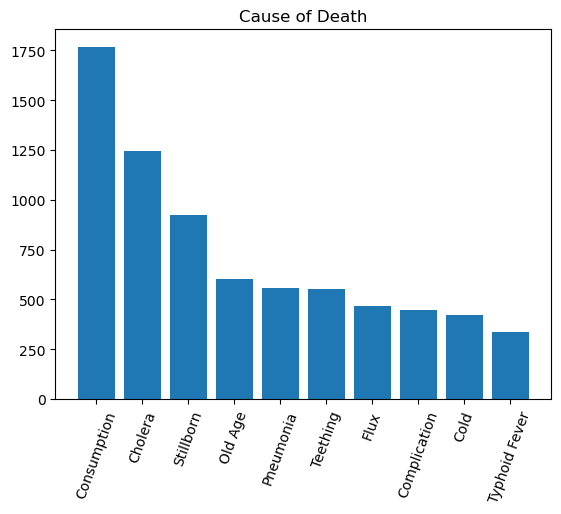

In [17]:
plt.bar('cause_of_death','count', data = top_10)
plt.xticks(rotation = 70)
plt.title('Cause of Death')

#### 3. Create a line chart showing the number of burials per year.

In [18]:
#cemetery_df["burial_year"]=cemetery_df["burial_year"].astype(int) (no-go error had issue with NA values in burial year column)
cemetery_df.isna().sum()


volume               0
name                 5
burial_month        39
month_number        39
burial_day          54
burial_year          2
sex                242
race                47
age               8674
residence           58
cause_of_death     317
ave                653
sec_lot           1120
remarks           3349
dtype: int64

In [19]:
cemetery_df["burial_year"]=cemetery_df["burial_year"].fillna(0)
cemetery_df["burial_year"]=cemetery_df["burial_year"].astype(int)
cemetery_df["burial_year"].unique()

array([1979, 1978, 1977, 1974, 1972, 1971, 1970, 1969, 1968, 1966, 1964,
       1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955, 1954, 1953, 1952,
       1951, 1950, 1949, 1948, 1947, 1946, 1945, 1944, 1943, 1942, 1941,
       1940, 1939, 1938, 1937, 1936, 1935, 1934, 1933, 1932, 1931, 1930,
       1929, 1918, 1928, 1927, 1926, 1916, 1925, 1872, 1924, 1923, 1922,
       1886, 1921, 1920, 1919, 1917, 1915, 1914, 1913, 1912, 1911, 1910,
       1909, 1908, 1906, 1907, 1905, 1904, 1885, 1903, 1902, 1901, 1900,
       1899, 1898, 1897, 1874, 1896, 1895, 1894, 1893, 1878, 1892, 1891,
       1890, 1889, 1888, 1887, 1884, 1883, 1873, 1882, 1881, 1880, 1879,
       1877, 1876, 1875, 1869, 1871, 1870, 1868, 1867, 1866, 1865, 1864,
       1863, 1862, 1860, 1861, 1859, 1858, 1857, 1856, 1855, 1854, 1853,
       1852, 1851, 1850, 1849, 1848, 1846, 1847,    0])

In [20]:
cemetery_df=cemetery_df.sort_values(["burial_month","month_number","burial_year"])
cemetery_df

,volume,name,burial_month,month_number,burial_day,burial_year,sex,race,age,residence,cause_of_death,ave,sec_lot,remarks
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,0,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot"
19744,5-1881,"Eves, R.",Apr,4.0,25.0,0,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot"
19499,4-1846,"Davis, John H.",Apr,4.0,1.0,1846,M,W,NaN,City,Apoplexy,NaN,lot,a member of Masonic Lodge no. 8
19500,4-1846,infant,Apr,4.0,2.0,1846,F,W,NaN,City,Stillborn,NaN,50,daughter of F. Klotts
19501,4-1846,"Cordell, William",Apr,4.0,3.0,1846,M,W,45.0,City,Dissipation,NaN,pauper,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1760,6J,Infant of Gerome Jones,NaN,NaN,NaN,1886,F,W,NaN,City,Dyp,Cherry,lot,"box paid, grave on Pete Harris Lot, infant of ..."
1623,6D,"Dortch, Nancy M.",NaN,NaN,NaN,1888,F,W,75.0,City,Old Age,Central,lot,"box paid, grave on Nat Dortchs lot"
1031,6B,Infant Son,NaN,NaN,NaN,1900,M,W,NaN,City,Stillborn,Central,lot,"child of Geo. Bosford, M. S, Combs lot"
194,6G,"Green, Fanis Bolster",NaN,NaN,19.0,1935,F,W,75.0,City,Myedas Ageny,Maple,Bolton,Fanis Bolton Green grave on Bolton lot


In [21]:
year_counts=cemetery_df["burial_year"].value_counts().reset_index()

year_counts=year_counts.drop(year_counts[year_counts["burial_year"]==0].index)
year_counts

,burial_year,count
0,1864,1372
1,1865,1366
2,1866,1354
3,1863,836
4,1850,809
...,...,...
124,1959,1
125,1961,1
126,1970,1
127,1974,1


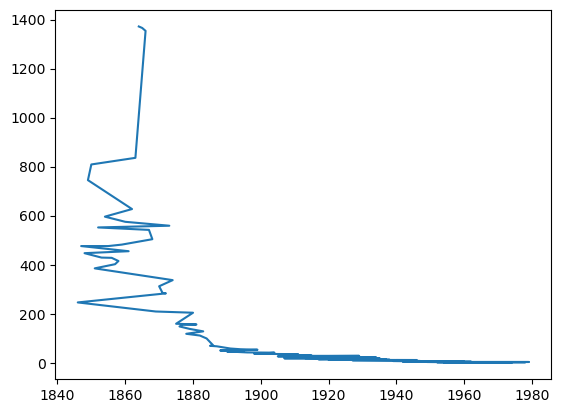

In [43]:
 
plt.plot(year_counts["burial_year"],year_counts["count"])

#coming back to fix this, line grpah doesn't look right

In [23]:
#corrected line graph . . .

#### 4. **Burials per Month and Year** 

 a. Use the [crosstab function](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) to build a summary table showing the number of burials per year per month. You should have one row per year and one column for month.  

In [24]:
pd.crosstab(cemetery_df.burial_year, cemetery_df.burial_month)




burial_month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
burial_year,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,0,0
1846,22,0,30,26,20,0,0,25,26,23,39,35
1847,35,61,34,34,43,40,47,38,26,36,47,35
1848,37,39,27,36,36,65,47,49,41,21,26,23
1849,43,36,33,64,46,96,231,64,62,24,18,28
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,1,0,0,0,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,1,0,0
1977,0,0,0,0,0,0,0,1,1,1,0,0


 b. After creating this summary table, make sure that the year labels are integers (no decimal part) and that the columns are sorted correctly.  

In [25]:
burial_year_months=pd.crosstab(cemetery_df.burial_year, cemetery_df.burial_month).reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], axis=1)
burial_year_months


burial_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
burial_year,,,,,,,,,,,,
0,0,0,0,2,0,0,0,0,0,0,0,0
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
...,...,...,...,...,...,...,...,...,...,...,...,...
1972,0,0,0,1,0,0,0,0,0,0,0,0
1974,0,0,0,0,0,0,0,0,0,0,1,0
1977,0,0,1,0,1,0,0,0,0,0,1,0


 c. Filter your table to show only the years 1846 through 1860.  

In [26]:
years_1846_1860=cemetery_df.loc[cemetery_df["burial_year"].isin(range(1846,1861))]
years_1846_1860['burial_year'].unique()


array([1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856,
       1857, 1858, 1859, 1860])

In [27]:
years_1846_1860=pd.crosstab(years_1846_1860.burial_year, years_1846_1860.burial_month).reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], axis=1)

years_1846_1860

burial_month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
burial_year,,,,,,,,,,,,
1846,20,26,25,22,26,0,0,0,35,39,23,30
1847,43,34,38,35,26,47,40,61,35,47,36,34
1848,36,36,49,37,41,47,65,39,23,26,21,27
1849,46,64,64,43,62,231,96,36,28,18,24,33
1850,24,26,43,29,37,120,370,52,22,27,28,31
1851,26,31,27,29,26,37,49,35,32,42,14,37
1852,37,32,39,37,58,84,76,54,31,32,36,36
1853,35,39,35,31,36,54,47,32,34,27,28,31
1854,35,33,34,43,61,137,95,44,34,25,25,30


<Axes: xlabel='burial_month', ylabel='burial_year'>

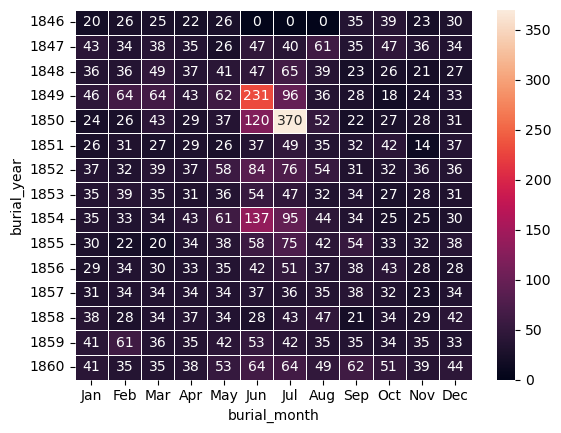

In [33]:
sns.heatmap(years_1846_1860, annot=True, fmt="d", linewidths=.5)

d. Go back to your original DataFrame and filter to the year and month that had the largest number of burials. What are the most common causes of death for that month?


In [41]:
highest_burial_month_year=cemetery_df.loc[(cemetery_df['burial_month']=='Jul') & (cemetery_df['burial_year']==1850)]
highest_burial_month_year['cause_of_death'].value_counts()


cause_of_death
Cholera                228
Not Known               46
Complicated             17
Teething                12
Diarhoera                8
Infl of Bowels           7
Consumption              7
Old Age                  6
Infl of Brain            6
Feever                   5
Worms                    3
Not known                3
Stillborn                2
Intemperance             2
Hooping Cough            2
Dearhaera                1
Effects of Medicine      1
Cut his throat           1
Not Knwon                1
Cholick                  1
Found Dead               1
Dearheora                1
Dearhorea                1
Lock jaw                 1
Brain Feever             1
Cholorea                 1
No Known                 1
Dropsey                  1
Mortification            1
Flux                     1
T. Feever                1
Name: count, dtype: int64

#### 5. **Burials per Decade**  

a. Create a "Decade" column to show the decade in which a burial occurred.

In [28]:
cemetery_df['decade']=cemetery_df["burial_year"]//10*10
cemetery_df.head()


,volume,name,burial_month,month_number,burial_day,burial_year,sex,race,age,residence,cause_of_death,ave,sec_lot,remarks,decade
19743,5-1881,"Higgins, Rebecca",Apr,4.0,10.0,0,F,W,68.0,City,Heart Disease,Cherry,lot,"box paid, grave on lot",0
19744,5-1881,"Eves, R.",Apr,4.0,25.0,0,M,W.,54.0,City,Heart Disease,Magnolia,lot,"box paid, grave on lot",0
19499,4-1846,"Davis, John H.",Apr,4.0,1.0,1846,M,W,NaN,City,Apoplexy,NaN,lot,a member of Masonic Lodge no. 8,1840
19500,4-1846,infant,Apr,4.0,2.0,1846,F,W,NaN,City,Stillborn,NaN,50,daughter of F. Klotts,1840
19501,4-1846,"Cordell, William",Apr,4.0,3.0,1846,M,W,45.0,City,Dissipation,NaN,pauper,NaN,1840


b. Examine the burials per decade. Look at the total number of burials and the proportion (aka percentage) of male burials and female burials. 

In [29]:
cemetery_df.loc[cemetery_df["sex"]=="F"]["decade"].value_counts()

decade
1860    3744
1850    2244
1870    1226
1840     869
1880     507
1890     245
1900     167
1910     129
1920      95
1930      72
1940      38
1950      16
1970      11
1960       8
0          1
Name: count, dtype: int64

In [36]:
cemetery_df.loc[cemetery_df["sex"]=="M"]["decade"].value_counts()

decade
1860    4063
1850    2629
1870    1208
1840    1034
1880     467
1890     230
1900     157
1910     108
1920      80
1930      70
1940      40
1950      11
1960       7
1970       3
0          1
Name: count, dtype: int64

In [31]:
pd.crosstab(cemetery_df.sex, cemetery_df.decade,rownames=['M','F'])

AssertionError: arrays and names must have the same length

 c. Create a clustered bar chart to show how male and female burials have changed over time.


### Bonus Questions

6. **Burials per Age Group**  
    a. Add a column to the original dataset to classify each row to one of the following categories (0-18, 19-25, 26-40, 41-64, and 65+). (Hint: One way to do this is using the [`cut` function](https://pandas.pydata.org/docs/reference/api/pandas.cut.html)).  
    b. Create a "Year Group" dividing the records up based on burial year. Use the following groups: Before 1880, 1880-1900, 1901-1920, After 1920.  
    c. Use a grouped bar chart to show how the proportion of burials per age group has changed over time. How would you describe the trends in terms of proportion of burials per age group over time?

7. **Last Names**  
    a. Create a new column titled Last Name. Extract the last name from the Name column by subsetting to all characters to the left of the comma. (Hint: See the pandas [string split function](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html). When you do this, make sure to consider cases where the name does not contain a comma.  
    b. What are the most common last names that appear?

8. The Civil War ended in April, 1865, with the last full year of fighting occurring in 1864.    
   a. Create a new DataFrame, burials_1864 by subsetting the full data to the rows for 1864 burials.  
   b. For any rows whose name contains the word "infant" (capitalized or lowercase), replace the "Age" value with 0.   
   c. Create a new column called age_category. If the individual was age 0 put "Infant". If the individual was not an infant but under age 18, put "Child". Everyone aged 18 and above should be listed as "Adult".  
   d.  Find the mean age for each age group.    
   e.  Find the last infant to be buried in 1864. Two ways this could be accomplished are sorting by both the month number and burial day or by creating a date column (for example, by using the [`to_datetime` function](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) and then sorting by this date column.